# License Plate Object Detection Using YOLOv8



Authors: Dustin Keller, Matthew Chaves, Syed Alif, Alfred Ulaj \
Date: March 2, 2024 \

This Jupyter Notebook contains the code used to train our YOLOv8 model for object detection, for the purpose of detecting license plates on our SensorStop unit.

In [1]:
!nvidia-smi

Tue Apr  2 01:41:14 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Installing YOLOv8

In [2]:
!pip install ultralytics==8.0.196

from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display

display.clear_output()

## Loading Roboflow Dataset

In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="////////") #erased for privacy
project = rf.workspace("license-plate-detection-ycxte").project("license-plate-detection-jfcxr")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


## Train Model on License Plate Dataset

In [4]:
import torch
print(torch.cuda.is_available())

True


In [9]:
model = YOLO('yolov8n.pt')
results = model.train(data="data.yaml", epochs=50)

New https://pypi.org/project/ultralytics/8.1.41 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, 

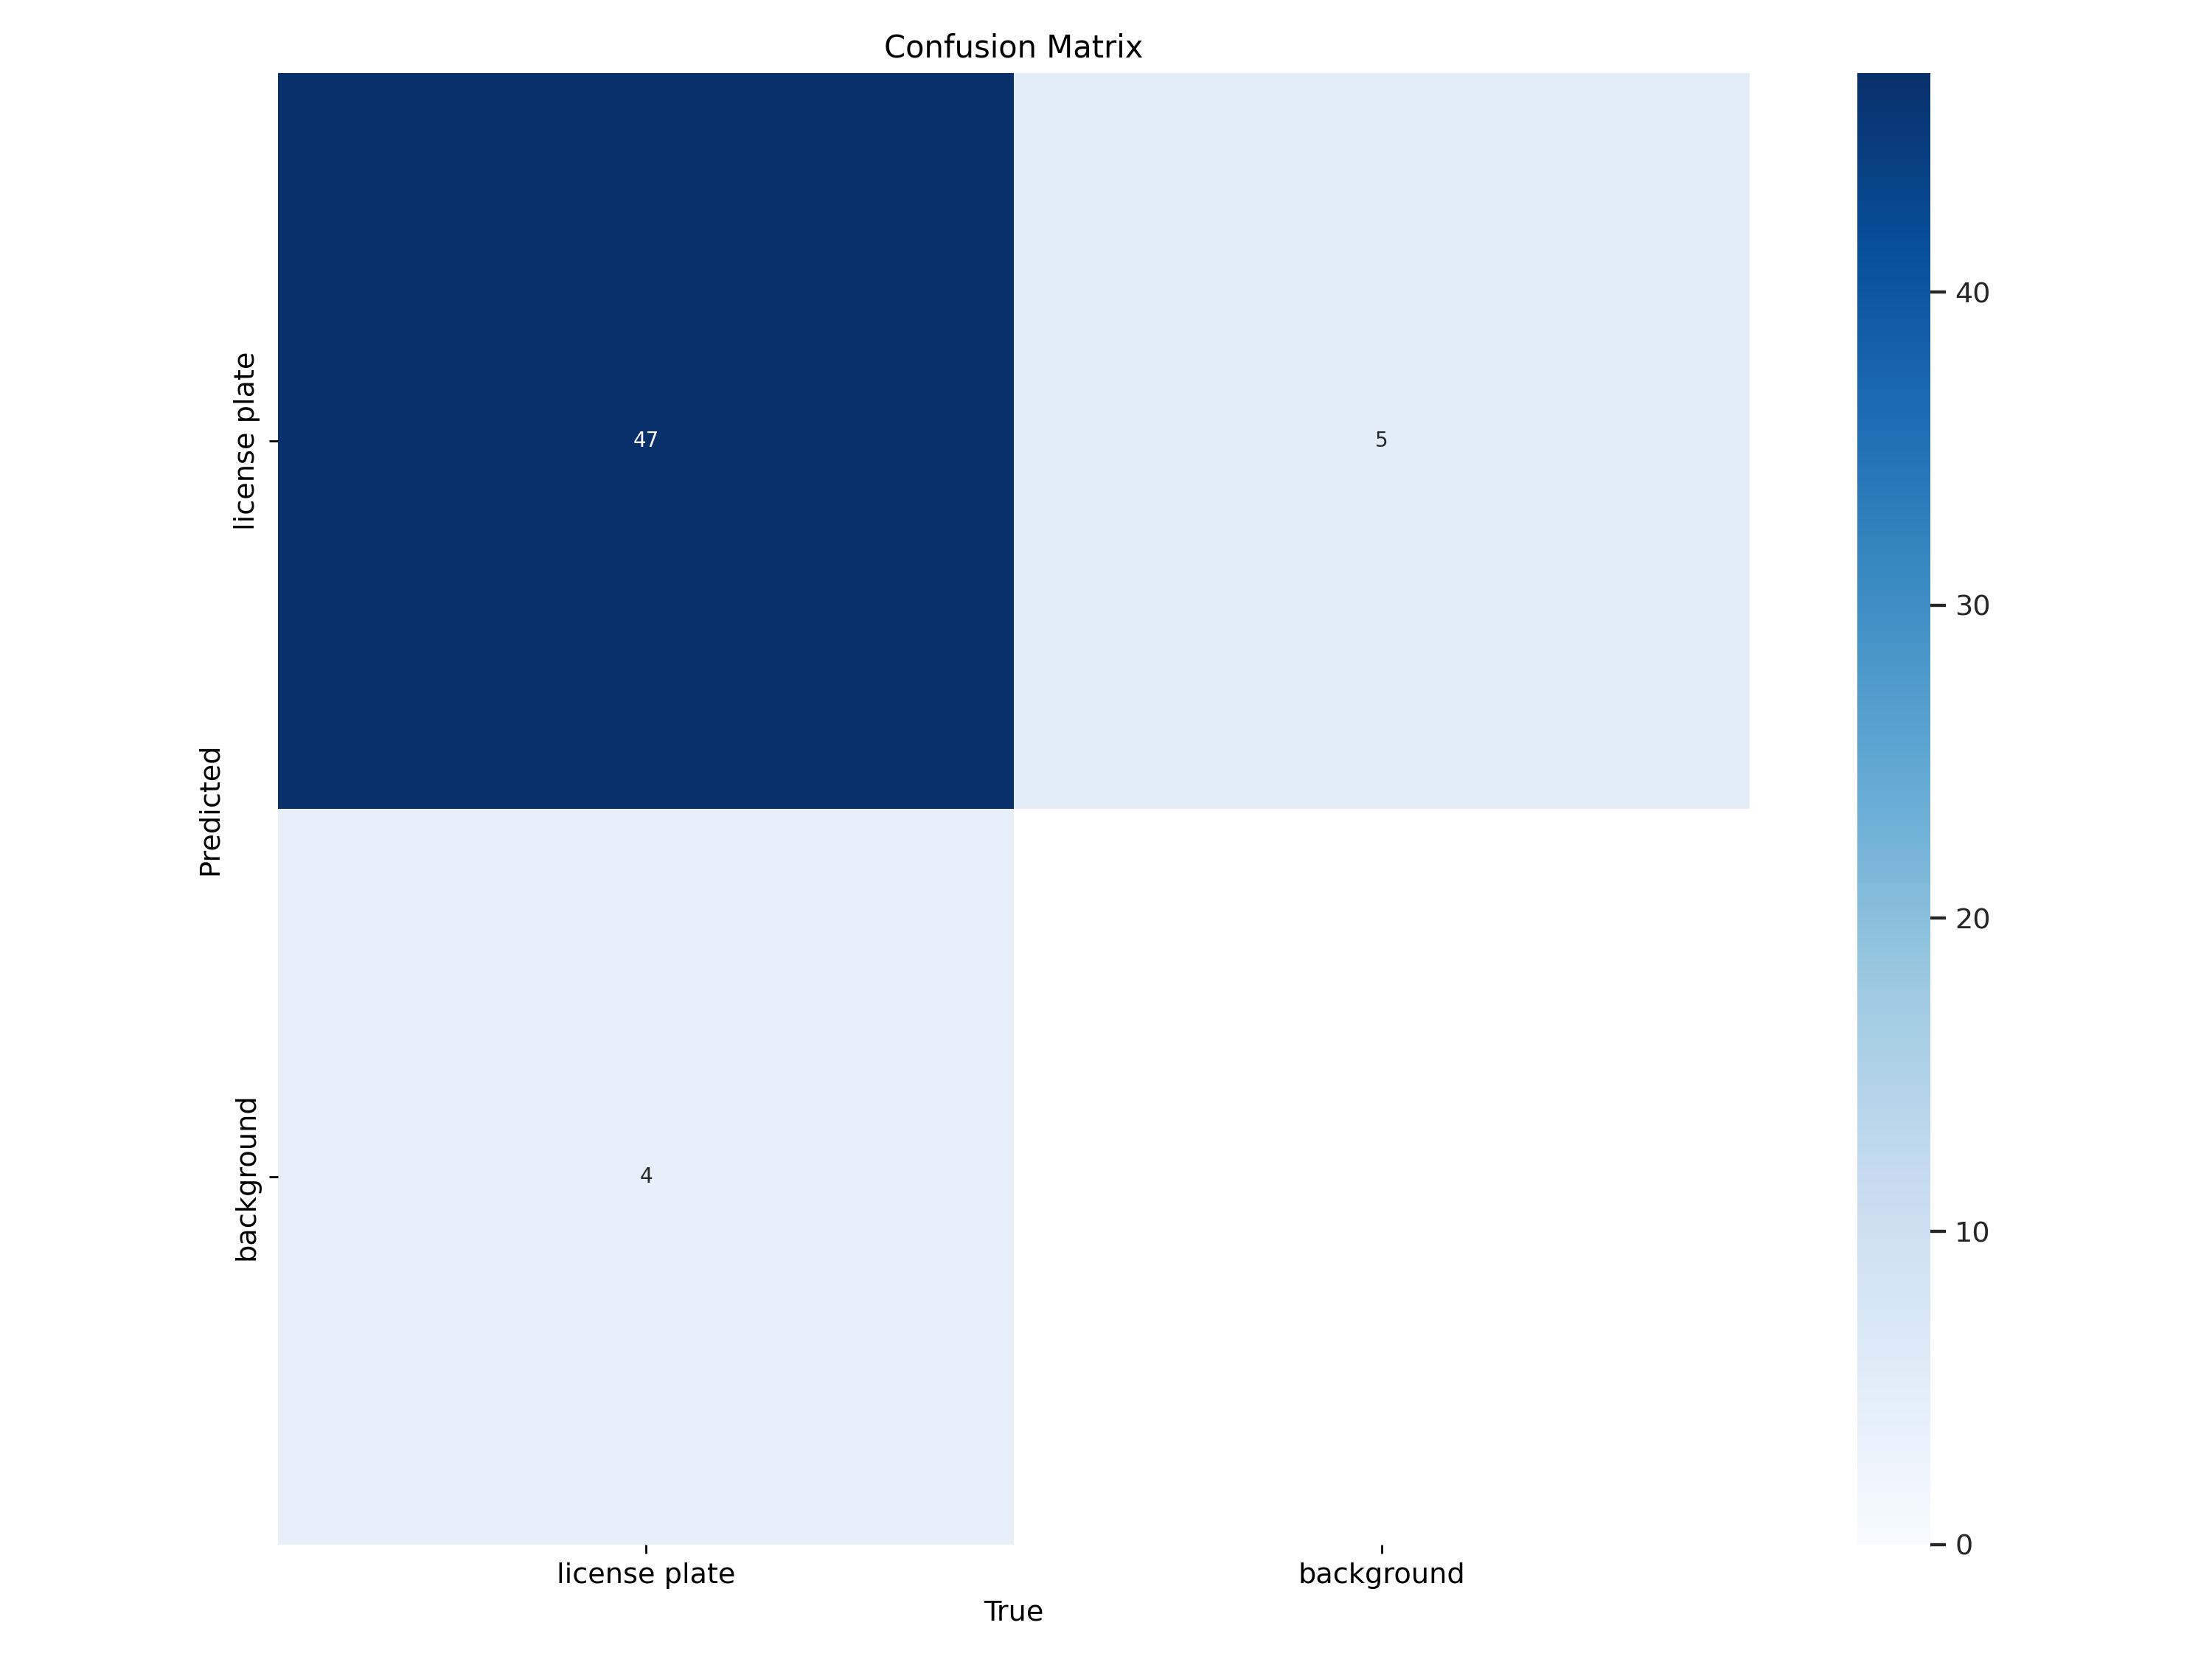

In [12]:
Image(filename=f'/content/runs/detect/train5/confusion_matrix.png', width=600)

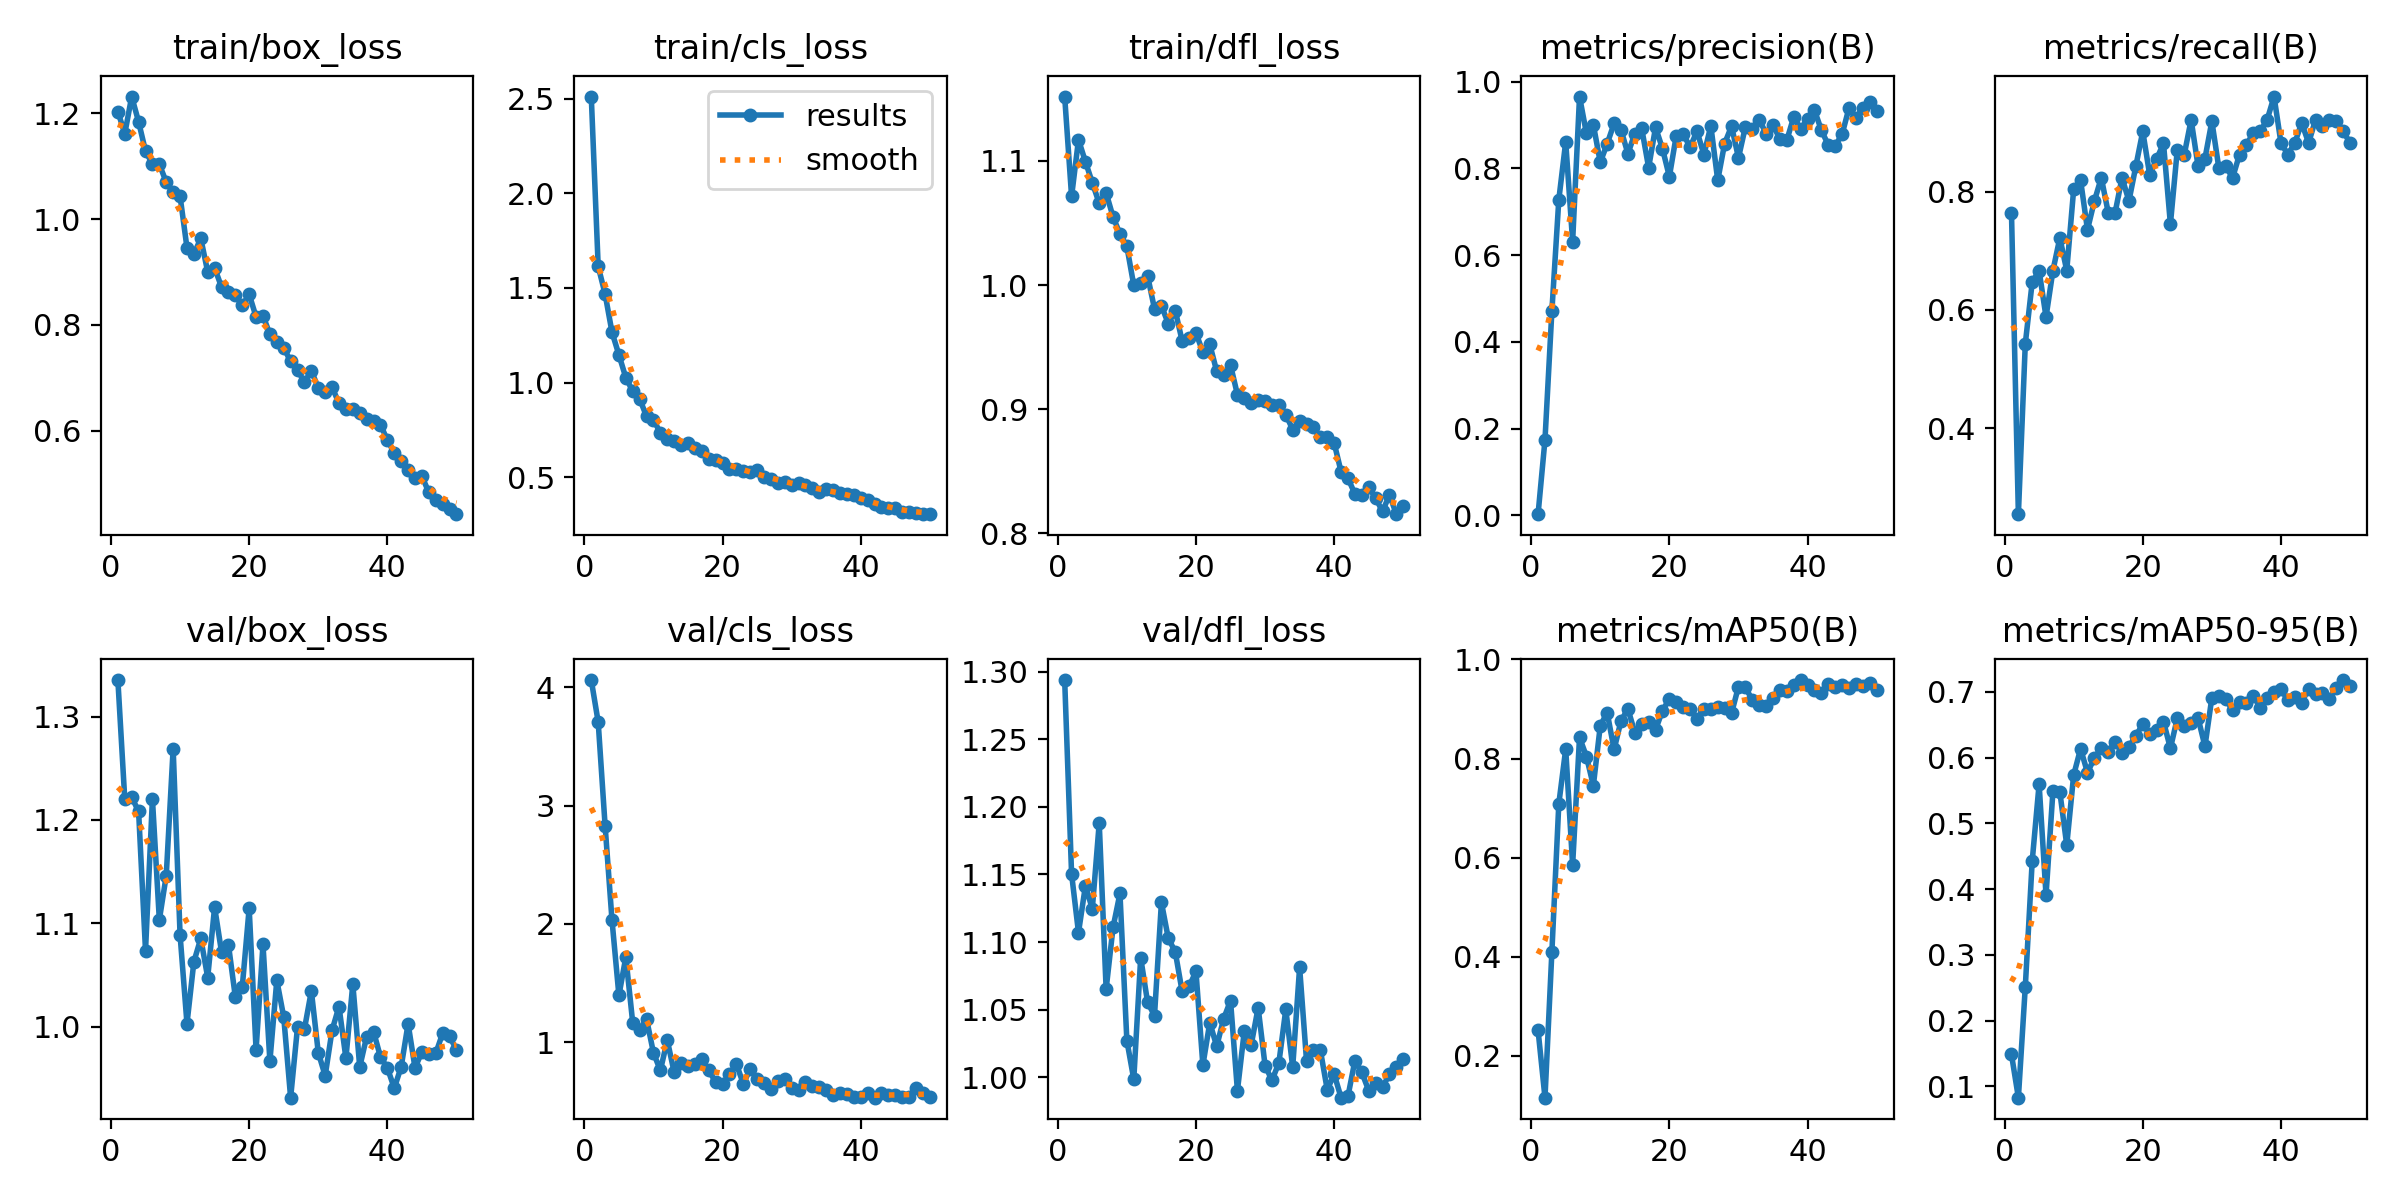

In [13]:
Image(filename=f'/content/runs/detect/train5/results.png', width=600)

## Validation

In [14]:
val_results = model.val()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/datasets/License-Plate-Detection-1/valid/labels.cache... 45 images, 2 backgrounds, 0 corrupt: 100%|██████████| 45/45 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.26it/s]
                   all         45         51      0.939      0.904      0.945      0.712
Speed: 0.3ms preprocess, 22.1ms inference, 0.0ms loss, 8.1ms postprocess per image
Results saved to runs/detect/val


### Labels

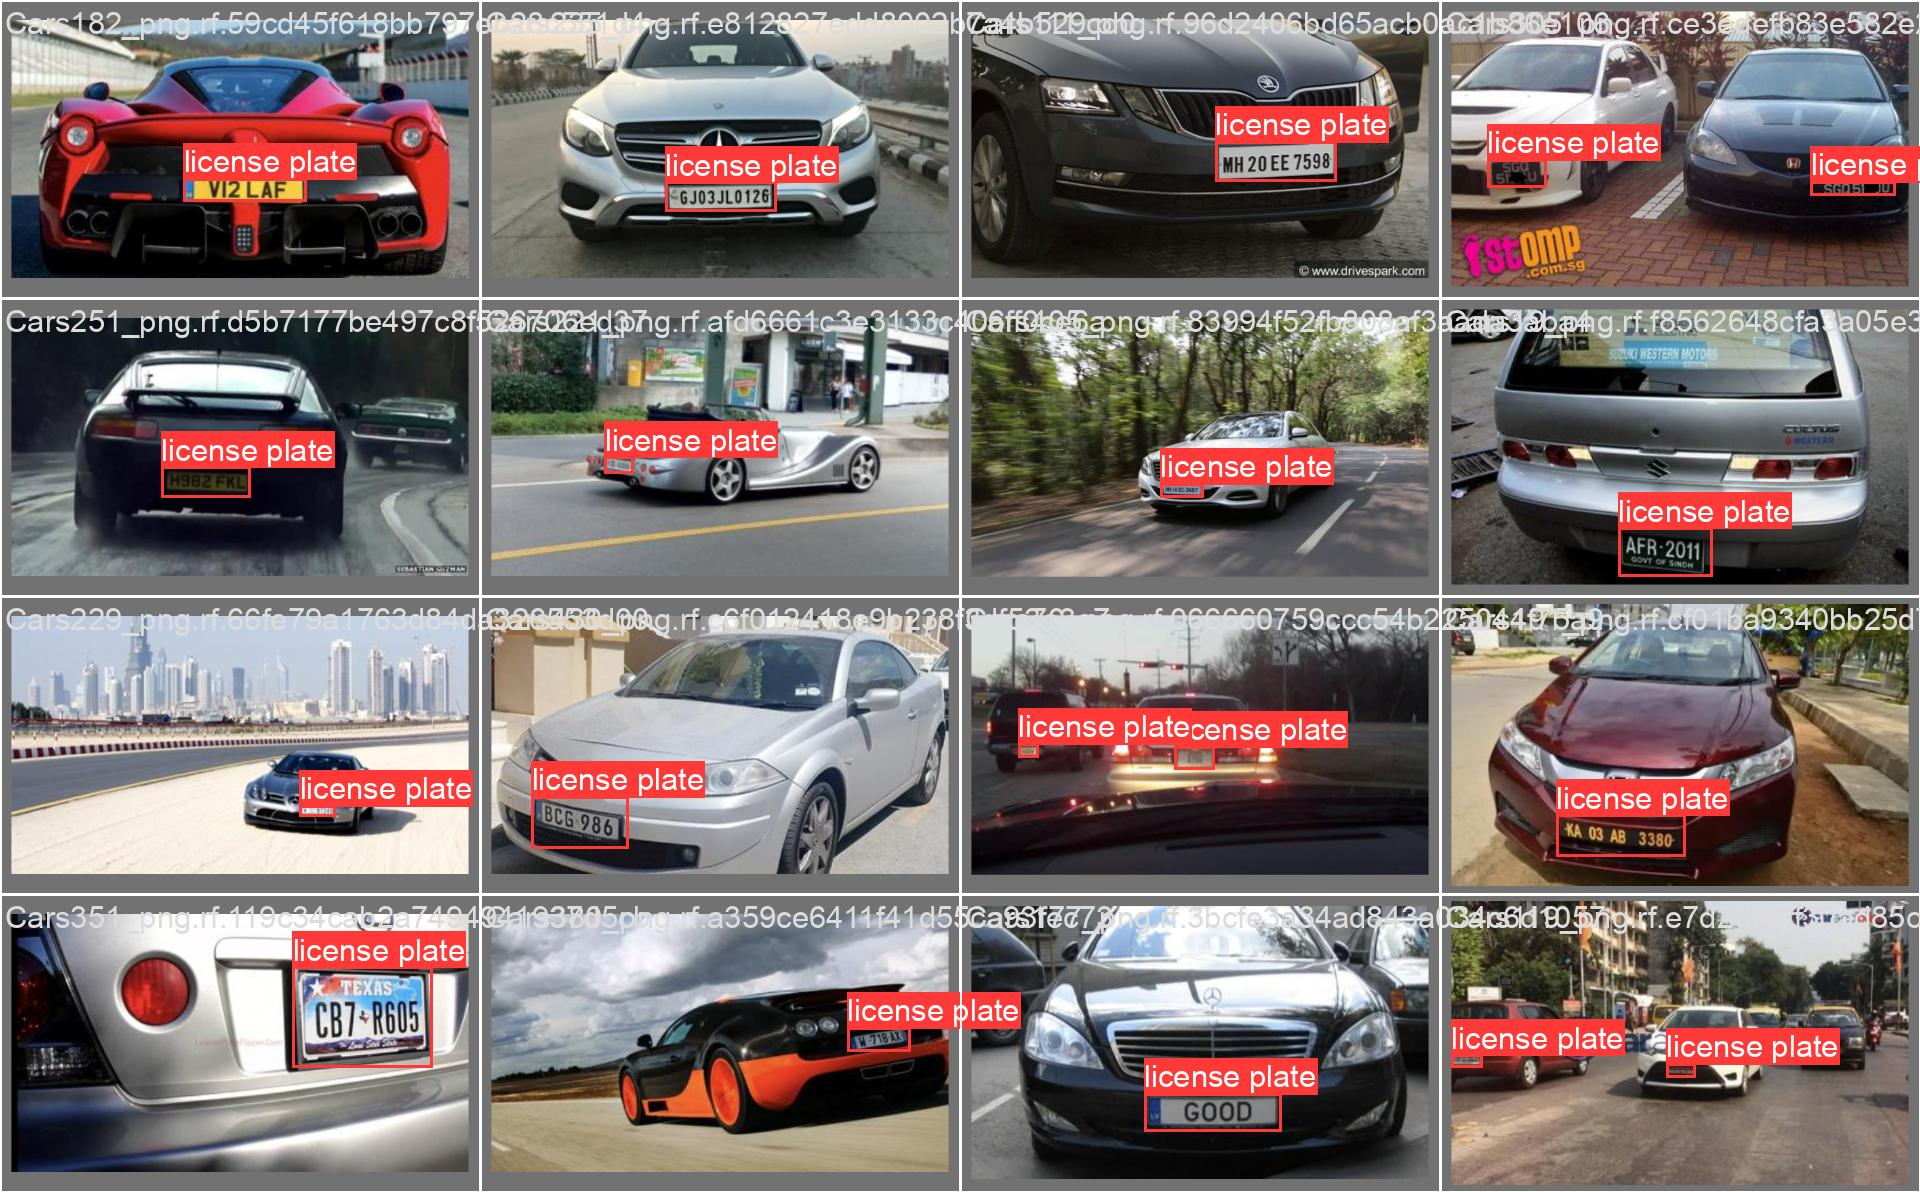

In [15]:
Image(filename=f'/content/runs/detect/val/val_batch0_labels.jpg', width=600)

### Predictions

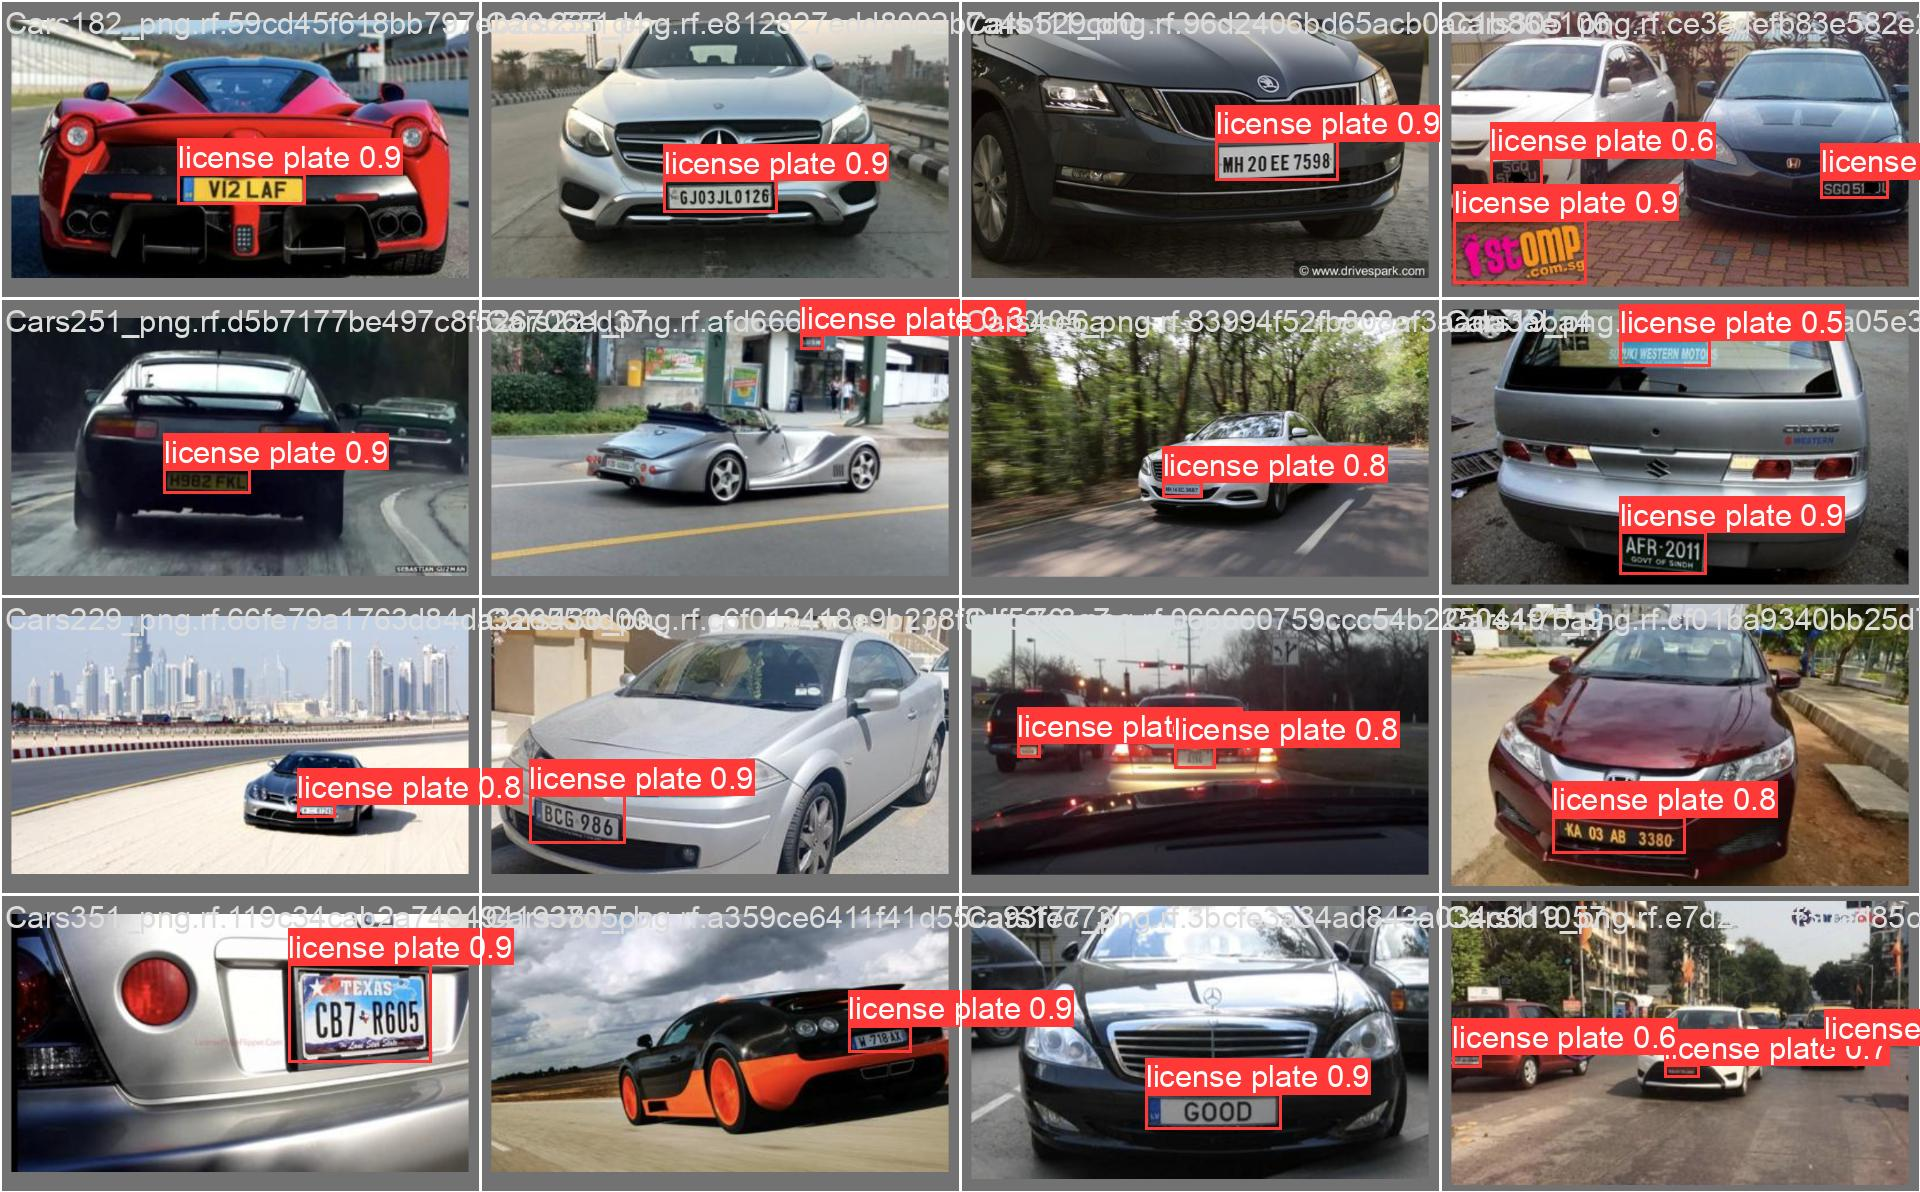

In [16]:
Image(filename=f'/content/runs/detect/val/val_batch0_pred.jpg', width=600)

## Export the Model

In [24]:
import zipfile
import os

def zip_folder(folder_path, output_path):
    with zipfile.ZipFile(output_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, _, files in os.walk(folder_path):
            for file in files:
                absolute_path = os.path.join(root, file)
                relative_path = os.path.relpath(absolute_path, folder_path)
                zipf.write(absolute_path, relative_path)

folder_to_zip = '/content/runs'
output_zip = '/content/LPD-runs.zip'

zip_folder(folder_to_zip, output_zip)

In [25]:
from google.colab import files
files.download(output_zip)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>